# Step by step Face extraction from images

We will set out how to crop/extract faces from images, to store them as separate images

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from imutils.paths import list_images

%matplotlib inline

Now let's define paths to a trained face detector, directory of images, and also define minimum probability for a detection

In [2]:
# path to directory containing images of this guide
path_images = "images"

# path to caffe model
path_caffemdel = "..//DNN_MODELS//opencv_face_detector.caffemodel"
path_model_architecture = "..//DNN_MODELS//opencv_face_detector.prototxt"

# define min confidence/probability to filter out weak detections
min_confiddence = 0.5

Load the face detector caffe model

In [3]:
net = cv2.dnn.readNetFromCaffe(path_model_architecture, path_caffemdel)

Let's checkout the images before we pass them thrugh the network

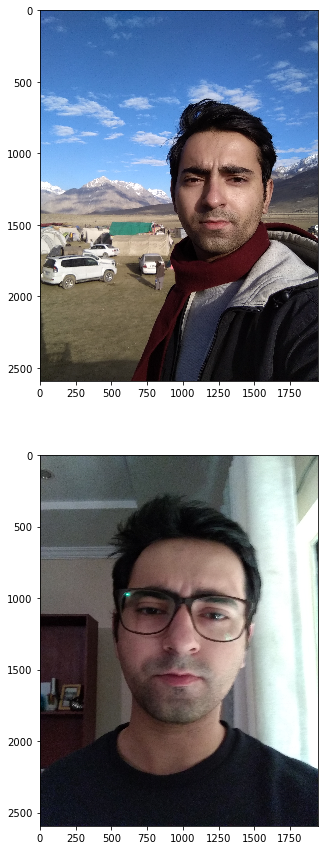

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(15, 15)) # 2 because two images in folder 

imagePaths = list(list_images(path_images))

for counter, imgpath  in enumerate(imagePaths):
    img = cv2.imread(imgpath)
    
    ax[counter].imshow(img[...,::-1])

plt.show()

Let's loop over the images, create blobs, pass blobs them though the network to get detections, and finally, crop the faces

[INFO] save cropped_testimg1 to directory
[INFO] save cropped_testimg2 to directory


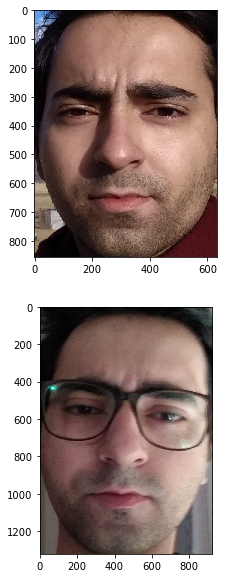

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

for counter, imgpath  in enumerate(imagePaths):
    image = cv2.imread(imgpath)
    
    # grab the image dims and construct blobs 
    h, w = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
                                (300, 300), (104.0, 177.0, 123.0))
    
    # pass the blob through the network and obtain detections 
    # and predictions
    net.setInput(blob)
    detections = net.forward()
    
    # ensure at least oe face was found
    if len(detections) > 0:
        # we're making assumption that each image has only ONE 
        # face, so find bounding box with the largest confidence
        i = np.argmax(detections[0, 0, :, 2])
        confidence = detections[0, 0, i, 2]
        
        # ensure that the detections with the largest confidence also
        # meets our min_confidence test (i.e. filter out weak 
        # detections)
        if confidence > min_confiddence:
            # compute (x, y) - coordinates of the bounding box for 
            # the face and extract face ROI
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype('int')
            face = image[startY:endY, startX:endX]
            
            ax[counter].imshow(face[...,::-1])
            
            # save the cropped face
            p = os.path.sep.join([path_images,
                                 "{}.png".format("cropped_testimg"+str(counter+1))])
            cv2.imwrite(p, face)
            print("[INFO] save {} to directory".format("cropped_testimg"+str(counter+1)))
            
            
plt.show()    

Now that we have figured how to create face crops we can move on to a python scrip to do the same for videos. Check out `get_example_from_videos.py`